# Neural network for image classification - cats and dogs

In [3]:
import cv2
import numpy as np
import os
import zipfile
# from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.16.1'

## 圖片轉像素

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


設定圖案大小

In [4]:
height, width = 128, 128

In [24]:
path = './Datasets/cat_dog_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [25]:
directory_train = './cat_dog_1/train'
directory_test = './cat_dog_1/test'
files_train = [os.path.join(directory_train, f) for f in sorted(os.listdir(directory_train))]
files_test = [os.path.join(directory_test, f) for f in sorted(os.listdir(directory_test))]

## 處理訓練圖片

In [29]:
images = []
classes = []

for image_path in files_train:
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2] # 取高跟寬（每一張圖片高度及寬度不會相同）
    except:
        continue

    # 將圖像調整為指定的寬度和高度
    image = cv2.resize(image, (width, height))
    # 將圖像轉換為灰度
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 顯示圖像
    # cv2_imshow(image)

    # 將圖像展平為一維數組
    image = image.ravel()
    # print(image.shape)

    # 將圖像添加到圖像列表中
    images.append(image)

    # 根據圖像名稱確定類別（貓或狗）
    image_name = os.path.basename(os.path.normpath(image_path))
    class_name = 0 if image_name.startswith('c') else 1
    classes.append(class_name) # 將類別標籤添加到類別列表中

    
# 資料由list轉numpy
X_train = np.asarray(images)
y_train = np.asarray(classes)   

查看資料

In [30]:
X_train.shape, y_train.shape

y_train

array([0, 0, 0, ..., 1, 1, 1])

## 處理測試圖片

In [31]:
images = []
classes = []
for image_path in files_test:
    try:
      image = cv2.imread(image_path)
      (H, W) = image.shape[:2]
    except:
      continue

    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # cv2_imshow(image)

    image = image.ravel() # 多維轉一維
    images.append(image)
    # print(image.shape)
    

    image_name = os.path.basename(os.path.normpath(image_path))
    class_name = 0 if image_name.startswith('c') else 1
    classes.append(class_name)
    # print(class_name)

X_test = np.asarray(images)
y_test = np.asarray(classes)

In [32]:
X_test.shape, y_test.shape


((1000, 16384), (1000,))

<Axes: xlabel='y_train', ylabel='count'>

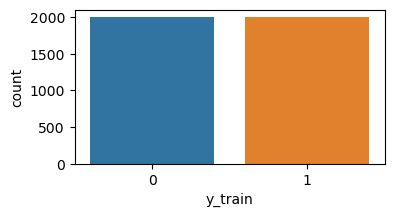

In [40]:

df = pd.DataFrame({'y_train': y_train}) # 将NumPy数组转换为Pandas DataFrame，并将列标记为分类变量
df['y_train'] = df['y_train'].astype('category')
plt.figure(figsize=(4, 2))  
sns.countplot(data=df, x='y_train')# 绘制计数直方图




<Axes: xlabel='y_test', ylabel='count'>

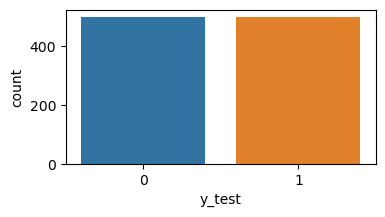

In [41]:
df = pd.DataFrame({'y_test': y_test}) # 将NumPy数组转换为Pandas DataFrame，并将列标记为分类变量
df['y_test'] = df['y_test'].astype('category')
plt.figure(figsize=(4, 2))  
sns.countplot(data=df, x='y_test')# 绘制计数直方图

## 資料正規化

In [48]:
print("原本資料")
print(X_train[0].max(), X_train[0].min()) # (236, 1)    ``

from sklearn.preprocessing import MinMaxScaler
# 创建一个MinMaxScaler对象
scaler = MinMaxScaler()
# 使用训练数据拟合（fit）并转换（transform）数据，使其在指定范围内缩放
X_train = scaler.fit_transform(X_train)
# 使用相同的缩放参数将测试数据转换为相同的比例
X_test = scaler.transform(X_test)
print("正規劃後")
print(X_train[0].max(), X_train[0].min()) # (0.9254901960784314 0.0)


原本資料
0.9254901960784314 0.0
正規劃後
0.9254901960784314 0.0


## 建立模型

In [ ]:
(16384 + 2) / 2

8193.0

In [49]:
"""
# units：(輸入+輸出)/2
# 特徵數過程：16384 -> 8193 -> 8193 -> 1
"""

network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
network1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

/Users/chenweicheng/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
network1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

## 編譯模型

In [51]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/

network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [52]:
history = network1.fit(X_train, y_train, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5127 - loss: 17.3434
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 123s 991ms/step - accuracy: 0.5344 - loss: 0.7160
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5118 - loss: 0.7061
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.4961 - loss: 0.7007
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2721s 22s/step - accuracy: 0.5131 - loss: 0.6985
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6465s 52s/step - accuracy: 0.5181 - loss: 0.6892
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.5011 - loss: 0.6902
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.4886 - loss: 0.6924
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5151 - loss: 0.6883
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.5300 - loss: 0.6815


## 評估模型

繪製損失曲線

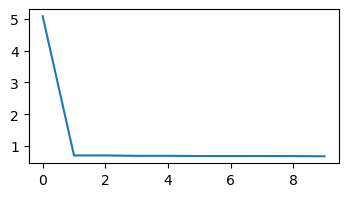

In [53]:
plt.figure(figsize=(4, 2))  
plt.plot(history.history['loss'])

繪製精確率

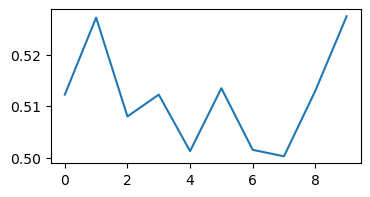

In [54]:
plt.figure(figsize=(4, 2))  
plt.plot(history.history['accuracy']);

## 產出預測值

In [56]:
print(X_test.shape)
predictions = network1.predict(X_test)

(1000, 16384)
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [57]:
predictions

array([[0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.51550126],
       [0.515

0 False - cat

1 True  - dog

In [58]:
predictions = (predictions > 0.5)
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [59]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: >

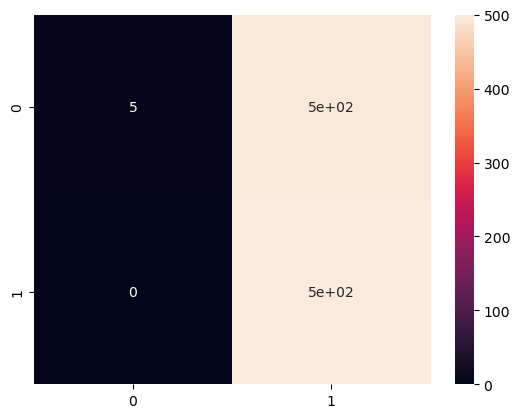

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       500
           1       0.50      1.00      0.67       500

    accuracy                           0.51      1000
   macro avg       0.75      0.51      0.34      1000
weighted avg       0.75      0.51      0.34      1000

